<a href="https://colab.research.google.com/github/Rawda11-Mohamed/diabetes_classification/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Dataset**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 12.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


# **Information about Dataset**

In [ ]:
import pandas as pd

# Load the dataset
data_path = path + "/diabetes.csv"  # Replace with the actual file name if different
df = pd.read_csv(data_path)

# Display the first few rows
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **Classifcation**


Decision Tree Performance:
Train Accuracy: 1.0
Test Accuracy: 0.7467532467532467

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



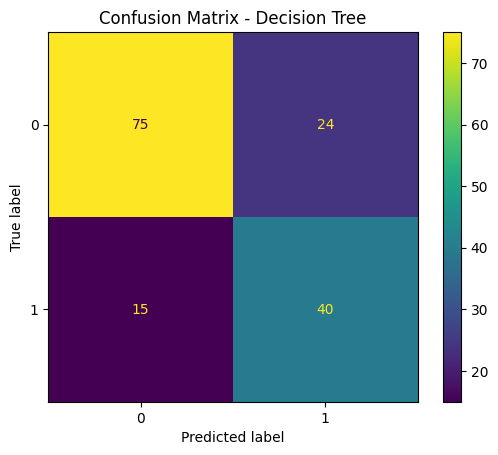

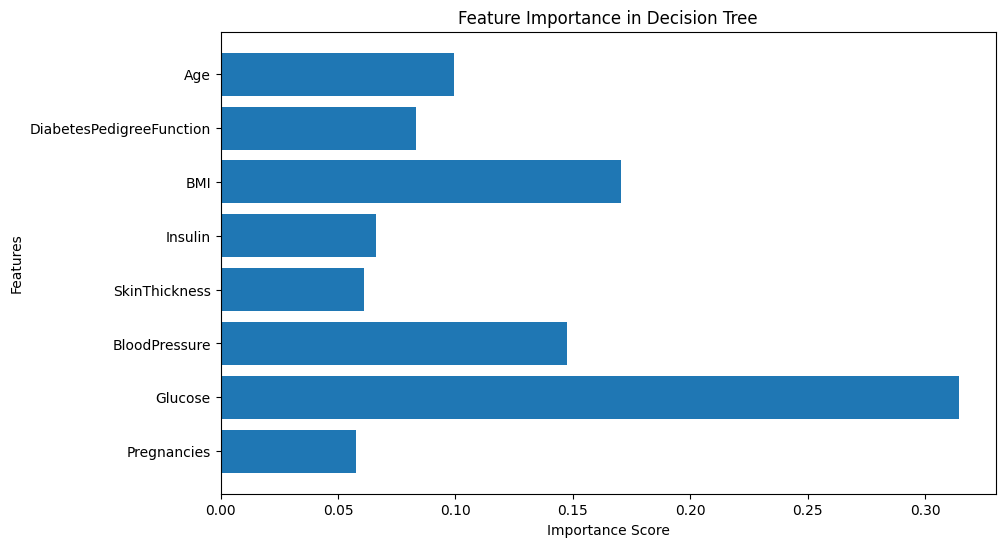

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split the dataset into features (X) and target (y)
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']               # Target

# Step 1: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Step 3: Evaluate Decision Tree
y_test_pred_dt = dt.predict(X_test)
train_accuracy_dt = accuracy_score(y_train, dt.predict(X_train))
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

print("\nDecision Tree Performance:")
print(f"Train Accuracy: {train_accuracy_dt}")
print(f"Test Accuracy: {test_accuracy_dt}")
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_test_pred_dt))
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Step 4: Visualize feature importance for Decision Tree
dt_feature_importances = dt.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, dt_feature_importances)
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# **Grid Search**

Fitting 5 folds for each of 192 candidates, totalling 960 fits

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}

Decision Tree Performance:
Train Accuracy: 0.7996742671009772
Test Accuracy: 0.7987012987012987

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       100
           1       0.70      0.74      0.72        54

    accuracy                           0.80       154
   macro avg       0.78      0.79      0.78       154
weighted avg       0.80      0.80      0.80       154



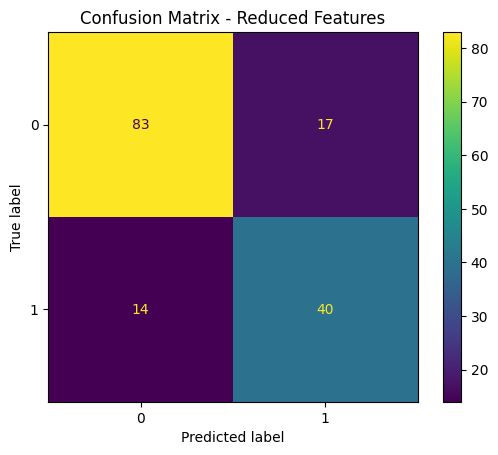

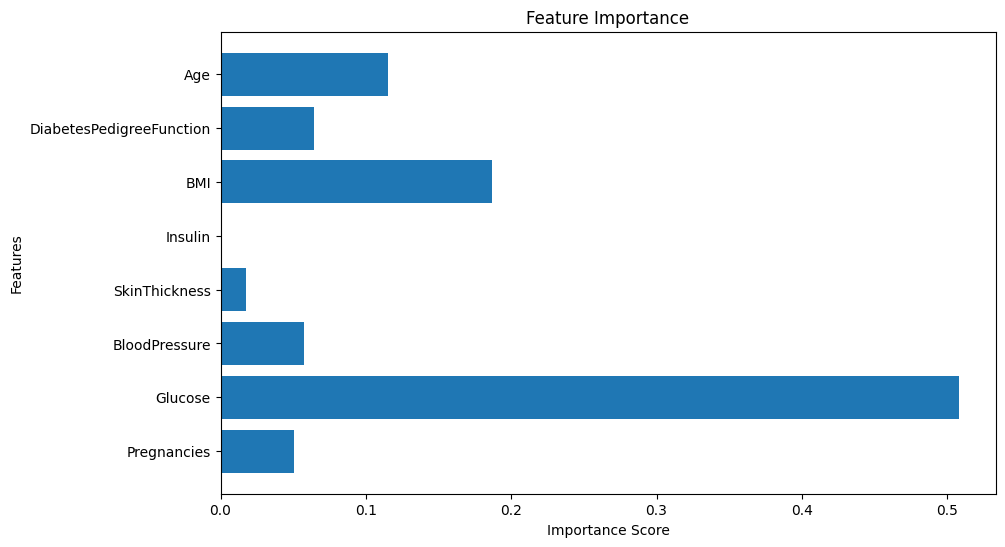

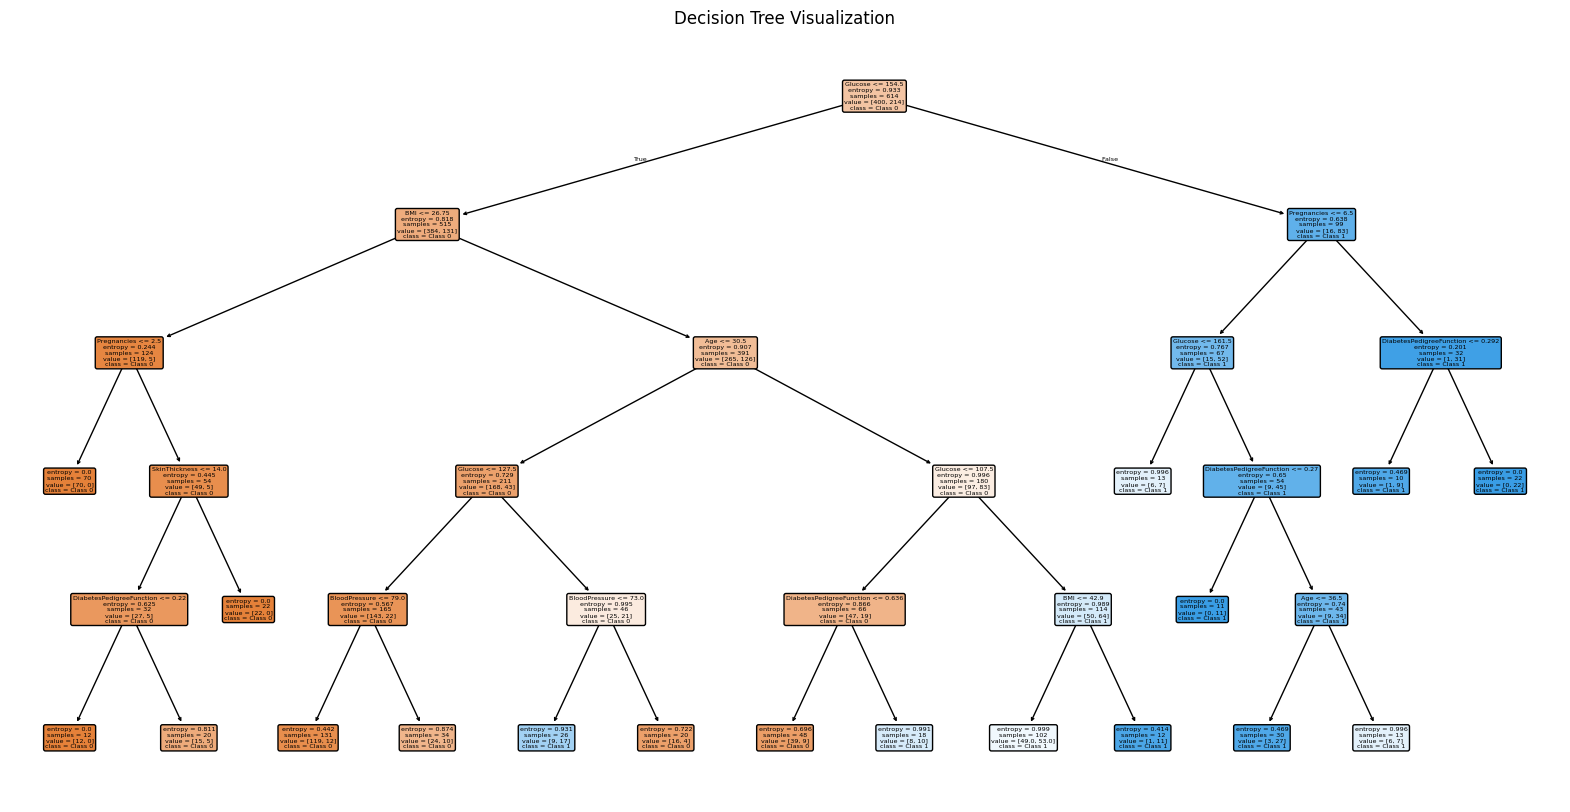

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Step 2: Hyperparameter Tuning
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
}

grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

# Get the best model and parameters
best_dt = grid_search_dt.best_estimator_
print("\nBest Parameters:", grid_search_dt.best_params_)

# Step 3: Evaluate the model
y_test_pred = best_dt.predict(X_test)
train_accuracy = accuracy_score(y_train, best_dt.predict(X_train))
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nDecision Tree Performance:")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_dt, X_test, y_test)
plt.title("Confusion Matrix - Reduced Features")
plt.show()

# Step 4: Plot Feature Importance
reduced_feature_importances = best_dt.feature_importances_
reduced_features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(reduced_features, reduced_feature_importances)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Step 5: Visualize the Decision Tree
plt.figure(figsize=(20, 10))  # Adjust size as needed
plot_tree(best_dt, feature_names=reduced_features, class_names=["Class 0", "Class 1"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
